In [136]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sys
import os
import zipfile
import urllib
import requests
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.api import abline_plot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mod', 'figure', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Get world Population Data

In [4]:
#Create the environmental variables for PUIDATA
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")
print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/nbc270/PUIDATA


In [5]:
#Collect world population data zipfile
urllib.request.urlretrieve('http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv','world_pop.gz')

('world_pop.gz', <http.client.HTTPMessage at 0x7f142a42b5c0>)

In [7]:
#Move the world population zipfile to PUIDATA
!mv world_pop.gz $PUIDATA

In [9]:
#Unzip the world population zipfile
zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/world_pop.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

In [12]:
#Read the world population csv into pandas. Must use a skiprows =4 to avoid a read-in related errror
world_pop = pd.read_csv(os.getenv("PUIDATA") + '/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv', skiprows = 4)
world_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [39]:
#Remove spaces from column names & extra columns
world_pop.columns = world_pop.columns.str.replace(' ', '_')
world_pop.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed:_62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [44]:
#Showing the data we wish to see
cols_of_interest1 = ['Country_Name','2012']
world_pop = world_pop[cols_of_interest2]
world_pop.columns = ['Country_Name','Population']
world_pop.head()

,Country_Name,Population
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


# Get Global GDP Data

In [32]:
#Collect world GDP data zipfile
urllib.request.urlretrieve('http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv','GDP.gz')

('GDP.gz', <http.client.HTTPMessage at 0x7f1427daa588>)

In [33]:
#Move the world GDP zipfile to PUIDATA
!mv GDP.gz $PUIDATA

In [34]:
#Unzip the world GDP zipfile
zip_ref = zipfile.ZipFile(os.getenv("PUIDATA") + '/GDP.gz', 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

In [35]:
#Read the world population csv into pandas. Must use a skiprows =4 to avoid a read-in related errror
gdp = pd.read_csv(os.getenv("PUIDATA") + '/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv', skiprows = 4)
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [38]:
#Remove spaces from column names & extra columns
gdp.columns = gdp.columns.str.replace(' ', '_')
gdp.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed:_62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [43]:
#Showing the data we wish to see
cols_of_interest2 = ['Country_Name','2012']
gdp = gdp[cols_of_interest2]
gdp.columns = ['Country_Name','GDP']
gdp.head()

,Country_Name,GDP
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


# Merging world population and gdp datasets

In [45]:
#Merge population and gdp data sets
world_data = gdp.merge(world_pop, left_on='Country_Name', right_on='Country_Name', how='outer')
world_data.head()

,Country_Name,GDP,Population
0,Aruba,NaN,102577.0
1,Afghanistan,2.053654e+10,30696958.0
2,Angola,1.139232e+11,25096150.0
3,Albania,1.231978e+10,2900401.0
4,Andorra,3.164615e+09,82431.0


# Get the Guns Data Part 1

In [36]:
#As of right now I have downloaded from the website (link below) it and placed it in my PUIDATA folder
# From here https://datawrapper.dwcdn.net/pvLFI/6/
guns = pd.read_csv(os.getenv("PUIDATA") + '/data-pvLFI.csv')
guns.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


# Get the Guns Data Part 2

In [46]:
#Collect gun data from Github
!curl https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv?accessType=DOWNLOAD > gun_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7852  100  7852    0     0  51176      0 --:--:-- --:--:-- --:--:-- 51320


In [47]:
#Move the gun data to PUIDATA
!mv gun_data.csv $PUIDATA

In [50]:
#Read in gun data
gun_data = pd.read_csv(os.getenv("PUIDATA") + '/gun_data.csv')
gun_data.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [52]:
#Clean the gun data dataframe
gun_data.columns = gun_data.columns.str.replace(' ', '_')
gun_data.columns = gun_data.columns.str.replace('/', '_')
cols_of_interest3 = ['Country_Territory','Average_total_all_civilian_firearms','Number_of_homicides_by_firearm']
gun_data = gun_data[cols_of_interest3]
gun_data.head()

,Country_Territory,Average_total_all_civilian_firearms,Number_of_homicides_by_firearm
0,Albania,270000.0,56.0
1,Algeria,1900000.0,20.0
2,Angola,2800000.0,NaN
3,Anguilla,NaN,1.0
4,Argentina,3950000.0,1198.0


# Merging all Gun Data

In [55]:
#Merge the two gun related datasets
world_guns = guns.merge(gun_data, left_on='Country', right_on='Country_Territory')
world_guns.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country_Territory,Average_total_all_civilian_firearms,Number_of_homicides_by_firearm
0,Australia,15.0,4,Australia,3050000.0,30.0
1,Austria,30.4,1,Austria,2500000.0,18.0
2,Belgium,17.2,2,Belgium,1800000.0,70.0
3,Canada,30.8,4,Canada,9950000.0,173.0
4,Denmark,12.0,0,Denmark,650000.0,15.0


# Merging all Data

In [58]:
#Merge the combined gun dataset with the GDP & Population Dataset
final_df = world_data.merge(world_guns, left_on='Country_Name', right_on='Country')
final_df.head()

,Country_Name,GDP,Population,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country_Territory,Average_total_all_civilian_firearms,Number_of_homicides_by_firearm
0,Australia,1.543411e+12,22742475.0,Australia,15.0,4,Australia,3050000.0,30.0
1,Austria,4.094252e+11,8429991.0,Austria,30.4,1,Austria,2500000.0,18.0
2,Belgium,4.978842e+11,11128246.0,Belgium,17.2,2,Belgium,1800000.0,70.0
3,Canada,1.824289e+12,34750545.0,Canada,30.8,4,Canada,9950000.0,173.0
4,Switzerland,6.680436e+11,7996861.0,Switzerland,45.7,2,Switzerland,3400000.0,57.0


In [66]:
#Data cleaning 
final_df.columns = final_df.columns.str.replace(' ', '_')
final_df['Number_of_mass_shootings'] = final_df['Number_of_mass_shootings_(1983-2013)']
final_df.head()

,Country_Name,GDP,Population,Country,Guns_per_100_inhabitants,Number_of_mass_shootings_(1983-2013),Country_Territory,Average_total_all_civilian_firearms,Number_of_homicides_by_firearm,Number_of_mass_shootings
0,Australia,1.543411e+12,22742475.0,Australia,15.0,4,Australia,3050000.0,30.0,4
1,Austria,4.094252e+11,8429991.0,Austria,30.4,1,Austria,2500000.0,18.0,1
2,Belgium,4.978842e+11,11128246.0,Belgium,17.2,2,Belgium,1800000.0,70.0,2
3,Canada,1.824289e+12,34750545.0,Canada,30.8,4,Canada,9950000.0,173.0,4
4,Switzerland,6.680436e+11,7996861.0,Switzerland,45.7,2,Switzerland,3400000.0,57.0,2


# Plotting GDP vs Mass shooting Plots

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


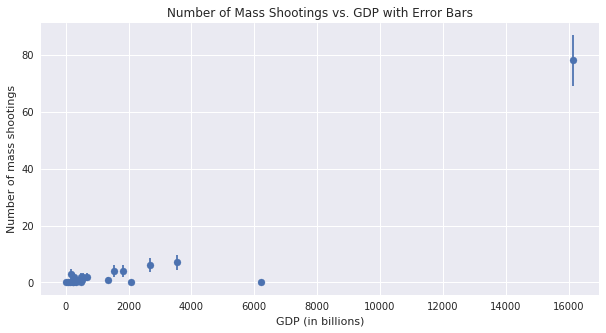

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [196]:
#Creating the plot
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(final_df.GDP / 1e9, final_df['Number_of_mass_shootings'])
ax.errorbar(final_df.GDP / 1e9, final_df['Number_of_mass_shootings'], 
            yerr = np.sqrt(final_df['Number_of_mass_shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
ax.set_title('Number of Mass Shootings vs. GDP with Error Bars')
plt.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

In [90]:
#Create the shootngspp column in the dataframe
final_df['shootingspp'] = final_df["Number_of_mass_shootings"] / final_df['Population'] * 1e3

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


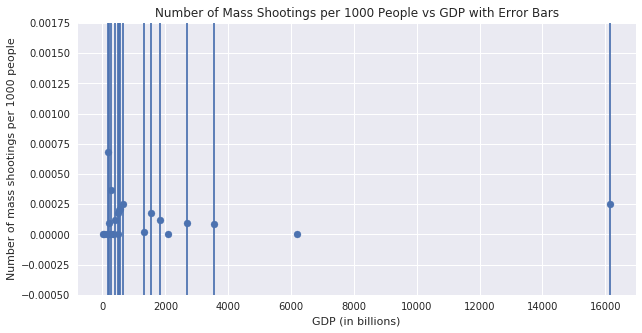

Number of mass shooting per 1000 people vs GDP, errors represent Poisson statistics.
The datapoint to the far right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [195]:
#Plot the figure
ymin, ymax = -0.0005, 0.00175
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(final_df.GDP / 1e9, final_df['shootingspp'])
ax.errorbar(final_df.GDP / 1e9, final_df['shootingspp'], 
            yerr = np.sqrt(final_df['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings per 1000 people")
ax.set_ylim([ymin,ymax])
ax.set_title('Number of Mass Shootings per 1000 People vs GDP with Error Bars')
plt.show()
print ("Number of mass shooting per 1000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the far right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

# Plotting the Average Number of Civilian Fire Arms per Person

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


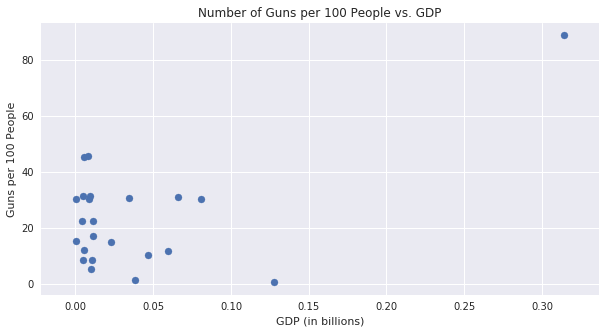

Number of guns per 100 people vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of guns per 100 people


In [194]:
#Plot the scatter plot with no error bars
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(final_df.Population / 1e9, final_df['Guns_per_100_inhabitants'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Guns per 100 People")
ax.set_ylim()
ax.set_title('Number of Guns per 100 People vs. GDP with')
plt.show()
print ("Number of guns per 100 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of guns per 100 people")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


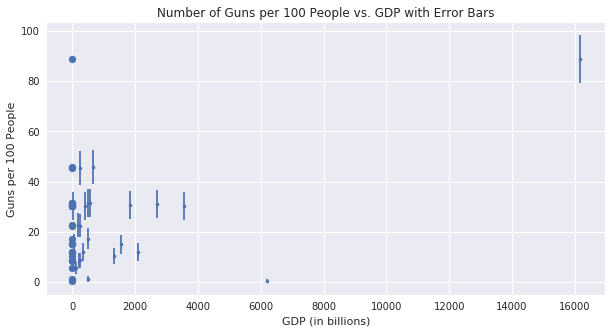

Number of guns per 100 people vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of guns per 100 people


In [193]:
#Plot with error bars
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(final_df.Population / 1e9, final_df['Guns_per_100_inhabitants'])
ax.errorbar(final_df.GDP / 1e9, final_df['Guns_per_100_inhabitants'], 
            yerr = np.sqrt(final_df['Guns_per_100_inhabitants'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Guns per 100 People")
ax.set_ylim()
ax.set_title('Number of Guns per 100 People vs. GDP with Error Bars')
plt.show()
print ("Number of guns per 100 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of guns per 100 people")

# Plot the Average Number of Homicide by Fire Arms per Person

Text(0.5,1,'Homicides by Firearms Per 1000 People Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


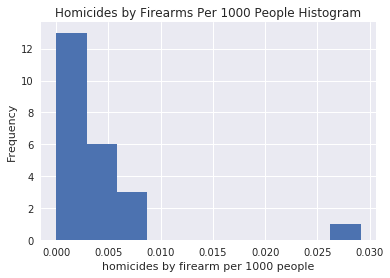

In [197]:
#Create a Histogram of Homicides by firearm per 1000 people
fig, ax = plt.subplots()
ax.hist(final_df['Number_of_homicides_by_firearm'] / final_df['Population'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');
ax.set_ylabel('Frequency')
ax.set_title('Homicides by Firearms Per 1000 People Histogram')

In [97]:
#Create the homipop column in the dataframe
final_df['homipop'] = final_df['Number_of_homicides_by_firearm'] / final_df['Population'] * 1000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


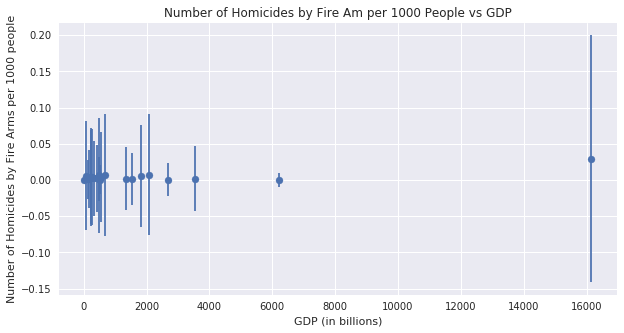

Number of Homicides by Fire Am per 1000 People vs GDP, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [198]:
#Create the related plot
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(final_df.GDP / 1e9, final_df['homipop'])
ax.errorbar(final_df.GDP / 1e9, final_df['homipop'], 
            yerr = np.sqrt(final_df['homipop'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of Homicides by Fire Arms per 1000 people")
ax.set_ylim()
ax.set_title("Number of Homicides by Fire Am per 1000 People vs GDP")
plt.show()
print ("Number of Homicides by Fire Am per 1000 People vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

# Plot the Number of Homicides by Fire Arm Against the Number of Civilian Firearms. Plot the US in a Different Color

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


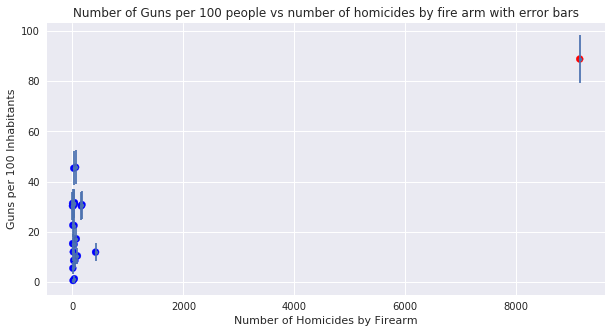

Number of Guns per 100 people vs number of homicides by fire arm, errors represent Poisson statistics.
The datapoint to the top right of the plot, which is highlighted in red, is the USA, which has noth the highest GDP and the highest number of mass shootings


In [200]:
#With Errors
col = np.where(final_df.Number_of_homicides_by_firearm<6000,'b','r')
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(final_df.Number_of_homicides_by_firearm, final_df['Guns_per_100_inhabitants'], c= col)
ax.errorbar(final_df.Number_of_homicides_by_firearm, final_df['Guns_per_100_inhabitants'], 
            yerr = np.sqrt(final_df['Guns_per_100_inhabitants'] * 1.0), fmt = '.')
ax.set_xlabel("Number of Homicides by Firearm")
ax.set_ylabel("Guns per 100 Inhabitants")
ax.set_ylim()
ax.set_title('Number of Guns per 100 people vs number of homicides by fire arm with error bars')
plt.show()
print ("Number of Guns per 100 people vs number of homicides by fire arm, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot, which is highlighted in red, is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


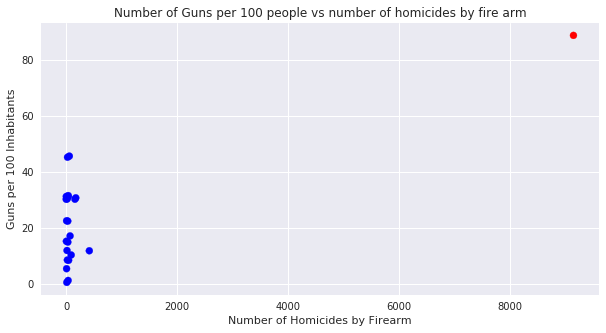

Number of Guns per 100 people vs number of homicides by fire arm, errors represent Poisson statistics.
The datapoint to the top right of the plot, which is highlighted in red, is the USA, which has noth the highest GDP and the highest number of mass shootings


In [201]:
#Without Errors
col = np.where(final_df.Number_of_homicides_by_firearm<6000,'b','r')
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(final_df.Number_of_homicides_by_firearm, final_df['Guns_per_100_inhabitants'], c = col)
ax.set_xlabel("Number of Homicides by Firearm")
ax.set_ylabel("Guns per 100 Inhabitants")
ax.set_ylim()
ax.set_title('Number of Guns per 100 people vs number of homicides by fire arm')
plt.show()
print ("Number of Guns per 100 people vs number of homicides by fire arm, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot, which is highlighted in red, is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

# Plot the Number of Mass Shootings Against the Number of Civilian Firearms. Plot the US in a Different Color

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


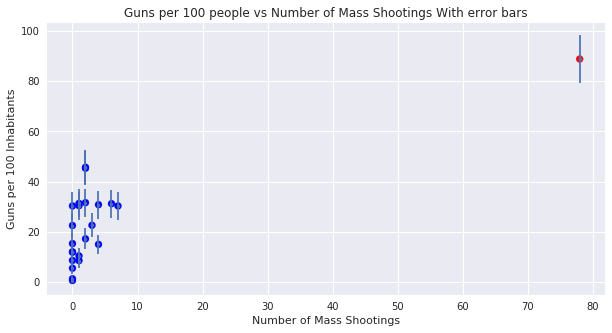

Number of guns per 100 people vs Number of mass shootings, errors represent Poisson statistics.
The datapoint to the top right of the plot, highlighted red, is the USA, which has noth the highest GDP and the highest number of mass shootings


In [206]:
#With Errors
col = np.where(final_df.Number_of_mass_shootings<60,'b','r')
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(final_df.Number_of_mass_shootings, final_df['Guns_per_100_inhabitants'], c = col)
ax.errorbar(final_df.Number_of_mass_shootings, final_df['Guns_per_100_inhabitants'], 
            yerr = np.sqrt(final_df['Guns_per_100_inhabitants'] * 1.0), fmt = '.')
ax.set_xlabel("Number of Mass Shootings")
ax.set_ylabel("Guns per 100 Inhabitants")
ax.set_title('Guns per 100 people vs Number of Mass Shootings With error bars')
ax.set_ylim()
plt.show()
print ("Number of guns per 100 people vs Number of mass shootings, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot, highlighted red, is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


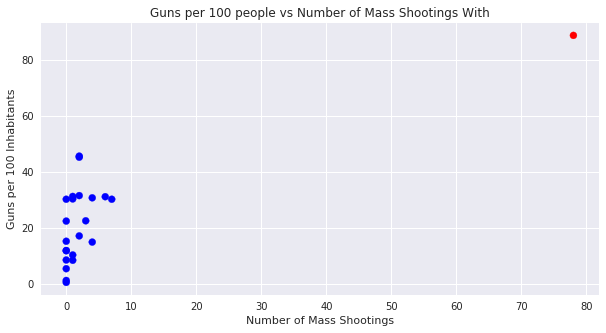

Number of guns per 100 people vs Number of mass shootings, errors represent Poisson statistics.
The datapoint to the top right of the plot, highlighted red, is the USA, which has noth the highest GDP and the highest number of mass shootings


In [205]:
#Without Errors
col = np.where(final_df.Number_of_mass_shootings<60,'b','r')
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(final_df.Number_of_mass_shootings, final_df['Guns_per_100_inhabitants'], c = col)
ax.set_xlabel("Number of Mass Shootings")
ax.set_ylabel("Guns per 100 Inhabitants")
ax.set_title('Guns per 100 people vs Number of Mass Shootings With')
ax.set_ylim()
plt.show()
print ("Number of guns per 100 people vs Number of mass shootings, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot, highlighted red, is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

# Fit a Line to the Number of Mass Shootings Per person as a Function of Average Total Civilian Firearms per Person

In [118]:
# First find the magnitudes of the means
final_df['Guns_per_100_inhabitants'].mean()

23.786956521739132

In [119]:
final_df['shootingspp'].mean()

0.00012356888832925394

In [130]:
#Next divide the values by the order of the means
norm_gunspp  = final_df['Guns_per_100_inhabitants']/10
norm_shottingspp = final_df['shootingspp']/0.0001

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Seaborn Plot of guns per person vs shootings per person')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


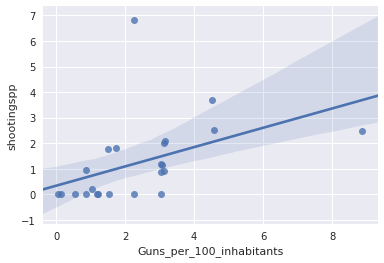

In [211]:
#Seaborn 
import seaborn as sns
ax = fig.add_subplot(221)
sns.regplot(x=norm_gunspp, y=norm_shottingspp, data=final_df)
ax.set_title('Seaborn Plot of guns per person vs shootings per person')

In the figure above, we see a seaborn plot of shootings per person vs guns per 100 people. The blue shaded area represents the error associated with the plot.

In [162]:
#OLS Regression
ols_result = sma.OLS(norm_shottingspp, sma.add_constant(norm_gunspp)).fit()
ols_beta0, ols_beta1 = smresult.params
beta0_ols, beta1_ols = ols_result.params
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     5.240
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0325
Time:                        17:40:47   Log-Likelihood:                -40.562
No. Observations:                  23   AIC:                             85.12
Df Residuals:                      21   BIC:                             87.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
const                        0.3374      0.499      0.676      0.506        -0.700     1.375
Guns_per_100_inhabitants     0.3776      0.165      2.289      0.033         0.035     0.721
==============================================================================
Omnibus:                       34.805   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.470
Skew:                           2.681   Prob(JB):                     2.26e-20
Kurtosis:                      11.103   Cond. No.                         5.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Guns Per Person')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


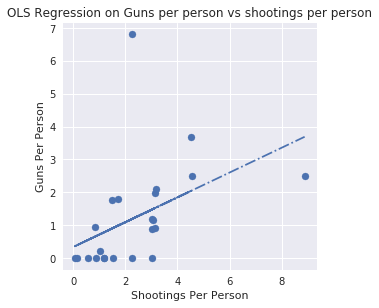

In [217]:
#Plot between x2 and y2 and wls statsmodel fit
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(221)
plt.scatter(norm_gunspp,norm_shottingspp)
plt.plot(norm_gunspp, norm_gunspp * beta1_ols + beta0_ols, '-.',label="OLS Fit")
ax.set_title('OLS Regression on Guns per person vs shootings per person')
ax.set_xlabel('Shootings Per Person')
ax.set_ylabel('Guns Per Person')

The figure above shows the OLS Regression plot of shootings per person (x-axis) vs guns per person (y-axis). The OLS appears to fit the data that well and very similar to the previous figure.

In [171]:
#WLS Regression 
weights = 1/var(norm_shottingspp)
wls_result = sma.WLS(norm_shottingspp, sma.add_constant(norm_gunspp),weights=weights).fit()
wls_beta0, wls_beta1 = smresult.params
beta0_wls, beta1_wls = ols_result.params
wls_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.200
Model:                            WLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     5.240
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0325
Time:                        17:51:12   Log-Likelihood:                -40.562
No. Observations:                  23   AIC:                             85.12
Df Residuals:                      21   BIC:                             87.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
const                        0.3374      0.499      0.676      0.506        -0.700     1.375
Guns_per_100_inhabitants     0.3776      0.165      2.289      0.033         0.035     0.721
==============================================================================
Omnibus:                       34.805   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.470
Skew:                           2.681   Prob(JB):                     2.26e-20
Kurtosis:                      11.103   Cond. No.                         5.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Guns Per Person')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


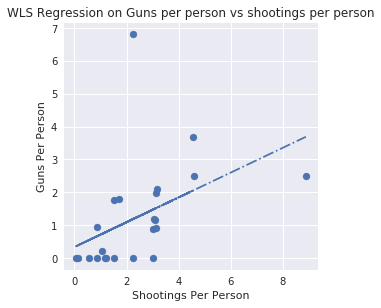

In [216]:
#Plot using coefficient information
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(221)
plt.scatter(norm_gunspp,norm_shottingspp)
plt.plot(norm_gunspp, norm_gunspp * beta1_wls + beta0_wls, '-.',label="WLS Fit")
ax.set_title('WLS Regression on Guns per person vs shootings per person')
ax.set_xlabel('Shootings Per Person')
ax.set_ylabel('Guns Per Person')

The figure above shows the WLS Regression plot of shootings per person (x-axis) vs guns per person (y-axis). The WLS appears to fit the data that well and very similar to the previous two figures.

In [187]:
#Polyfit of degree 1
polyfit = np.polyfit(norm_shottingspp,norm_gunspp,1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Polyfit Plot of guns per person vs shootings per person')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


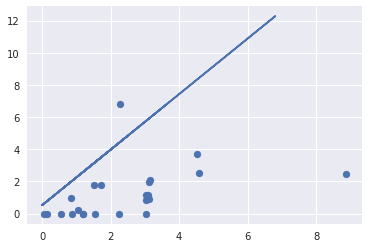

In [215]:
#Plot the function
ax = fig.add_subplot(221)
plt.scatter(norm_gunspp,norm_shottingspp)
plt.plot(norm_shottingspp, polyfit[0] + polyfit[1] * norm_shottingspp, '-')
ax.set_title('Polyfit Plot of guns per person vs shootings per person')

The figure above shows the polyfit plot of shootings per person (x-axis) vs guns per person (y-axis). The polyfit, while straight due to being of degree one, does not appear to fit the data that well.